In [1]:
import os

os.mkdir('/content/pred_result')  

In [2]:
import zipfile

with zipfile.ZipFile('/content/my_test_image.zip') as target_file:
  target_file.extractall('my_test_image')

In [3]:
import shutil
import glob

label_list = []
for i in glob.glob('/content/my_test_image/*'):
  label_list.append(i.split('/')[3])
print(label_list)

['automobile', 'airplane', 'horse', 'ship', 'deer', 'dog', 'frog', 'bird', 'truck', 'cat']


In [11]:
target_root_dir = 'pred_result'

if not os.path.exists(target_root_dir):
  os.mkdir(target_root_dir)
  print(target_root_dir + 'is created !!!') 

In [4]:
for i in label_list:
  os.mkdir('/content/pred_result/{}'.format(i))

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import load_model 

In [9]:
try:
  cnn = load_model('/content/cifar10_accuracy_82v1.h5')
  cnn.summary()

except Exception as err:
  print(err)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [10]:
import cv2

In [ ]:
img_path_list = []
for i in glob.glob('/content/my_test_image/*/*'):
  img_path_list.append(i)

In [ ]:
label_list = []
for i in glob.glob('/content/my_test_image/*/*'):
  label_list.append(i.split('/')[4].split('.')[0].strip())

In [ ]:
len(img_path_list)

10

In [ ]:
src_img_list = []
dst_img_list = []

for index in range(len(img_path_list)):

  src_img = cv2.imread(img_path_list[index], cv2.IMREAD_COLOR)
  dst_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
  dst_img = cv2.resize(dst_img, (32, 32))
  dst_img = dst_img / 255.0

  print(src_img.shape, dst_img.shape)

  src_img_list.append(src_img)
  dst_img_list.append(dst_img)

(168, 300, 3) (32, 32, 3)
(196, 258, 3) (32, 32, 3)
(190, 265, 3) (32, 32, 3)
(168, 299, 3) (32, 32, 3)
(576, 1024, 3) (32, 32, 3)
(199, 254, 3) (32, 32, 3)
(425, 320, 3) (32, 32, 3)
(640, 960, 3) (32, 32, 3)
(900, 1200, 3) (32, 32, 3)
(510, 525, 3) (32, 32, 3)


In [ ]:
x_test = np.array(dst_img_list)

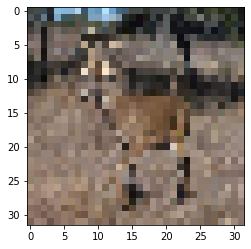

In [ ]:
plt.imshow(x_test[1])

In [ ]:
pred_y = model.predict(x_test)

print(np.argmax(pred_y, axis = 1))

[2 6 6 8 0 9 3 3 9 5]


In [ ]:
len(np.argmax(pred_y, axis = 1))

10

In [ ]:
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

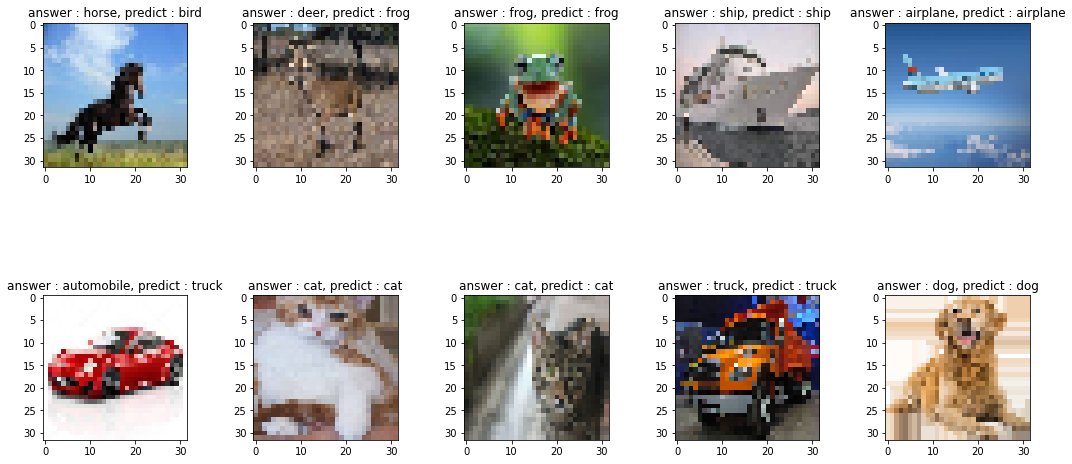

In [ ]:
plt.figure(figsize = (15, 8))

for i in range(len(pred_y)):
  
  plt.subplot(2, 5, i+1)
  plt.title('answer : ' + label_list[i] + ', predict : ' + class_name[np.argmax(pred_y[i])], )
  plt.imshow(x_test[i])
  
plt.tight_layout()
plt.show()

In [ ]:
os.mkdir('/content/pred_result/unknown')

In [ ]:
for index in range(len(pred_y)):

  class_index = np.argmax(pred_y[index])
  print('prediction =>', class_name[class_index], pred_y[index].max())

prediction => bird 0.44065484
prediction => frog 0.8590545
prediction => frog 0.97000724
prediction => ship 0.9960563
prediction => airplane 0.99951756
prediction => truck 0.50861996
prediction => cat 0.38814557
prediction => cat 0.8946541
prediction => truck 0.55893034
prediction => dog 0.49567932


In [ ]:
top3 = 3

for index in range(len(pred_y)):
  sorted_index = pred_y[index].argsort()
  sorted_index = sorted_index[::-1]

  print('='*30)
  print(sorted_index)

  for j in range(top3):
    pred_val = pred_y[index, sorted_index[j]]
    class_index = sorted_index[j]
    print('prediction = > ', class_name[class_index], pred_val)

[2 7 0 3 6 5 4 9 8 1]
prediction = >  bird 0.44065484
prediction = >  horse 0.29750487
prediction = >  airplane 0.07216573
[6 4 3 2 5 7 9 0 1 8]
prediction = >  frog 0.8590545
prediction = >  deer 0.11379467
prediction = >  cat 0.020658279
[6 3 2 4 5 0 8 7 9 1]
prediction = >  frog 0.97000724
prediction = >  cat 0.021124817
prediction = >  bird 0.006228713
[8 0 9 6 1 3 2 4 7 5]
prediction = >  ship 0.9960563
prediction = >  airplane 0.0029145142
prediction = >  truck 0.0005219638
[0 2 8 3 9 4 1 6 5 7]
prediction = >  airplane 0.99951756
prediction = >  bird 0.0002905705
prediction = >  ship 0.00019096266
[9 1 0 8 6 3 2 5 7 4]
prediction = >  truck 0.50861996
prediction = >  automobile 0.4913783
prediction = >  airplane 1.2694372e-06
[3 4 5 2 7 0 6 9 8 1]
prediction = >  cat 0.38814557
prediction = >  deer 0.30882868
prediction = >  dog 0.12524806
[3 2 6 5 4 7 0 8 9 1]
prediction = >  cat 0.8946541
prediction = >  bird 0.053712875
prediction = >  frog 0.027285857
[9 1 0 8 6 3 2 7 5 4]
p

In [ ]:
import shutil

for index in range(len(pred_y)):

  class_index = np.argmax(pred_y[index])
  print('prediction =>', class_name[class_index], pred_y[index].max())

  if pred_y[index].max() >= 0.3 :

    target_dir = target_root_dir